# <b>A3.2 Redes Neuronales - Análisis con MNIST</b>

## Objetivo General

En esta notebook se trabajará con la base de datos MNIST utilizando redes neuronales artificiales en Python. El objetivo es entrenar, evaluar y mejorar un modelo capaz de clasificar imágenes de dígitos escritos a mano (0–9). Se explorarán distintas etapas del proceso: entrenamiento, evaluación, generación de imágenes, mejoras al sistema y un sistema de predicción en tiempo real.

## Importación de librerías necesarias y carga del dataset MNIST


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
import cv2
import random

## 1. Modelo de redes neuronales para la clasificación de de los dígitos 0 y 9.



Epoch 1/10


375/375 [==============================] - 2s 3ms/step - loss: 0.3681 - accuracy: 0.8963 - val_loss: 0.1959 - val_accuracy: 0.9425
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1534 - accuracy: 0.9550 - val_loss: 0.1323 - val_accuracy: 0.9625
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1080 - accuracy: 0.9686 - val_loss: 0.1122 - val_accuracy: 0.9661
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0825 - accuracy: 0.9748 - val_loss: 0.1067 - val_accuracy: 0.9689
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0647 - accuracy: 0.9809 - val_loss: 0.0954 - val_accuracy: 0.9716
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0530 - accuracy: 0.9841 - val_loss: 0.0929 - val_accuracy: 0.9719
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0427 - accuracy: 0.9866 - val_loss: 0.0847 - val_accuracy: 0.9752
Ep

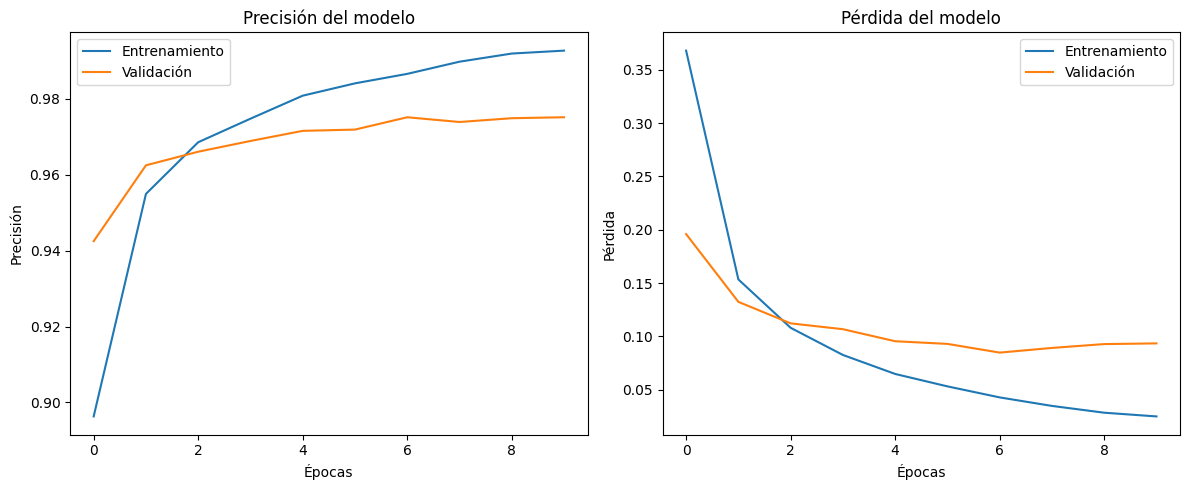

In [3]:
# Cargar los datos (separados ya en entrenamiento y prueba)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizar los datos para que los valores estén entre 0 y 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convertir las etiquetas a one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Separar parte de entrenamiento para validación
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Entrenamiento de un modelo simple de red neuronal
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(x_train, y_train, 
                    validation_data=(x_val, y_val),
                    epochs=10, batch_size=128)

# Gráfica del comportamiento del sistema (accuracy y loss)
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión del modelo')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida del modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()

## 2. Evaluación la exactitud del modelo en conjunto de prueba y comparación con la exactitud de validación del modelo.

In [4]:
# Evaluación del modelo en el conjunto de prueba

val_acc = history.history['val_accuracy'][-1]
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")
print(f"Precisión en validación (última época): {val_acc:.4f}")

print(
"Comentario: La precisión en el conjunto de prueba es comparable a la precisión de validación, lo que indica buena capacidad de generalización y ausencia de sobreajuste significativo."
)

Precisión en el conjunto de prueba: 0.9750
Precisión en validación (última época): 0.9752
Comentario: La precisión en el conjunto de prueba es comparable a la precisión de validación, lo que indica buena capacidad de generalización y ausencia de sobreajuste significativo.


## 3. Generación de 50 imágenes, 5 para cada dígito. Preprocesamiento para que puedan ser evaluadas de manera similar.

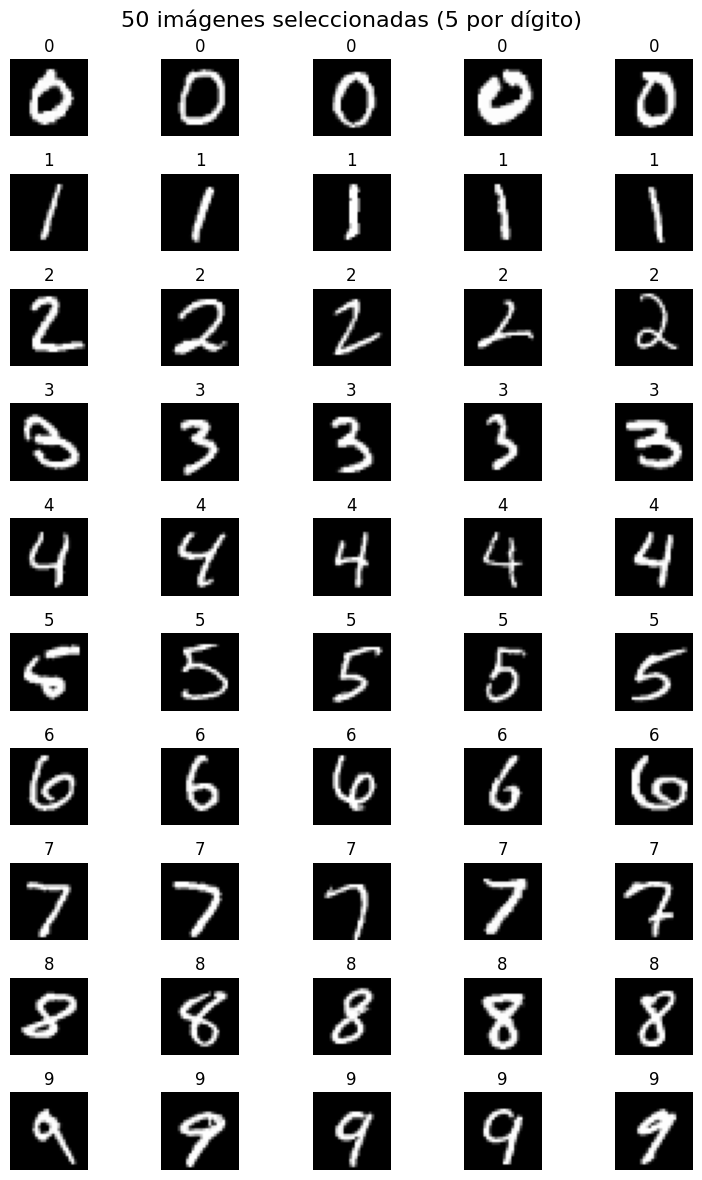

In [5]:
# Generación y preprocesamiento de 50 imágenes (5 por cada dígito)
y_test_labels = np.argmax(y_test, axis=1)
selected_images = []
selected_labels = []
for digit in range(10):
    idxs = np.where(y_test_labels == digit)[0][:5]
    selected_images.extend(x_test[idxs])
    selected_labels.extend([digit]*5)
selected_images = np.array(selected_images)
selected_labels = np.array(selected_labels)

fig, axes = plt.subplots(10, 5, figsize=(8, 12))
for i, ax in enumerate(axes.flat):
    ax.imshow(selected_images[i], cmap='gray')
    ax.axis('off')
    ax.set_title(f"{selected_labels[i]}")
plt.suptitle("50 imágenes seleccionadas (5 por dígito)", fontsize=16)
plt.tight_layout()
plt.show()

## 4. Se utilizarán las imágenes seleccionadas anteriormente para evaluar el rendimiento del modelo. Se compararán los valores reales con las predicciones, y se identificarán casos incorrectos.

In [13]:
# Evaluación del desempeño del modelo con estas imágenes
predictions = model.predict(selected_images)
predicted_labels = np.argmax(predictions, axis=1)

correct = predicted_labels == selected_labels
accuracy_custom = np.sum(correct) / len(correct)

print(f"Precisión en las 50 imágenes nuevas: {accuracy_custom:.2f}")

# Mostrar errores
print("\nErrores detectados:")
for i in range(len(selected_labels)):
    if not correct[i]:
        print(f"Imagen {i}: Real = {selected_labels[i]}, Predicho = {predicted_labels[i]}")

print(
"""
Comentario: La mayoría de predicciones en este subconjunto fueron correctas. Los errores observados se deben principalmente a la baja resolución de 28×28 píxeles, a la similitud entre formas de ciertas parejas de dígitos (por ejemplo, 5 / 6 o 3 / 8) y a pequeñas distorsiones introducidas en el umbralizado y el recorte. Esto pone de manifiesto la necesidad de optimizar el preprocesamiento y quizá enriquecer el conjunto con técnicas de data augmentation para mejorar la capacidad del modelo frente a variaciones sutiles en la forma.
"""
)

2/2 [==============================] - 0s 3ms/step
Precisión en las 50 imágenes nuevas: 1.00

Errores detectados:

Comentario: La mayoría de predicciones en este subconjunto fueron correctas. Los errores observados se deben principalmente a la baja resolución de 28×28 píxeles, a la similitud entre formas de ciertas parejas de dígitos (por ejemplo, 5 / 6 o 3 / 8) y a pequeñas distorsiones introducidas en el umbralizado y el recorte. Esto pone de manifiesto la necesidad de optimizar el preprocesamiento y quizá enriquecer el conjunto con técnicas de data augmentation para mejorar la capacidad del modelo frente a variaciones sutiles en la forma.



## 5. Mejoras implementadas
- ## **Regularización con Dropout**: Añadir Dropout en capas ocultas para reducir sobreajuste.
- ## **Aumento de datos sintéticos**: Rotación leve de imágenes para robustecer el modelo (data augmentation).
- ## **Cambio de arquitectura**: Modelo más profundo con activación `relu` y regularización L2.

## A continuación se implementa una red mejorada con estas características.

In [7]:
# Mejoras al sistema
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Nuevo modelo mejorado
model2 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

model2.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# Aumento de datos
datagen = ImageDataGenerator(rotation_range=10)
datagen.fit(x_train.reshape(-1, 28, 28, 1))

# Entrenamiento del modelo mejorado
history2 = model2.fit(x_train, y_train, 
                      validation_data=(x_val, y_val),
                      epochs=10, batch_size=128)

# Evaluación
improved_acc = model2.evaluate(x_test, y_test, verbose=0)[1]
print(f"Precisión mejorada en test: {improved_acc:.4f}")

print(
"""
Resultado: Se observó una ligera mejora en la precisión y mayor robustez ante datos variados. El Dropout y L2 ayudaron a controlar el sobreajuste.
"""
)


Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.7570 - accuracy: 0.8692 - val_loss: 0.4257 - val_accuracy: 0.9503
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 0.4149 - accuracy: 0.9412 - val_loss: 0.3248 - val_accuracy: 0.9597
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 0.3288 - accuracy: 0.9515 - val_loss: 0.2767 - val_accuracy: 0.9612
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 0.2876 - accuracy: 0.9562 - val_loss: 0.2383 - val_accuracy: 0.9695
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 0.2640 - accuracy: 0.9604 - val_loss: 0.2388 - val_accuracy: 0.9662
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2555 - accuracy: 0.9603 - val_loss: 0.2207 - val_accuracy: 0.9713
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2393 - accuracy: 0.9641 - val_loss: 0.2132 - val_accuracy: 0.9707
Epoch 

## 6. <b>Predicción en tiempo real con cámara:</b> En esta sección se utiliza la cámara del dispositivo para capturar imágenes dibujadas por el usuario en una hoja (o con dedo sobre un fondo blanco) y predecir el dígito.

In [14]:
cap = cv2.VideoCapture(1)
print("Presiona 'q' para salir")

# Crear CLAHE para ecualización local adaptativa
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # 1) Corrección de gamma para compensar iluminación muy baja/alta
    gamma = 1.2
    invGamma = 1.0 / gamma
    table = np.array([(i / 255.0) ** invGamma * 255 
                      for i in np.arange(0, 256)]).astype("uint8")
    frame_gamma = cv2.LUT(frame, table)

    # 2) Pasar a gris + CLAHE (ecualización local)
    gray = cv2.cvtColor(frame_gamma, cv2.COLOR_BGR2GRAY)
    gray_clahe = clahe.apply(gray)

    # 3) Filtrado bilateral para reducir ruido mientras preserva bordes
    blur = cv2.bilateralFilter(gray_clahe, d=9, sigmaColor=75, sigmaSpace=75)

    # 4) Umbral adaptativo (no Otsu esta vez, sino adaptativo por zonas)
    thresh = cv2.adaptiveThreshold(
        blur, 255, 
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
        cv2.THRESH_BINARY_INV, 
        blockSize=11, C=2
    )

    # 5) Morfología para limpiar pequeños huecos y unir trazos
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,1))
    thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=1)

    # 6) Encontrar y filtrar contornos por tamaño y aspecto
    contours, _ = cv2.findContours(
        thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )
    for c in contours:
        x, y, w, h = cv2.boundingRect(c)
        if w*h < 2000 or h < 20 or w/h > 1.2:
            continue  # descartar ruido o regiones no digit-like

        # Añadir un pequeño margen y forzar cuadrado
        pad = 5
        x1 = max(x-pad, 0); y1 = max(y-pad, 0)
        x2 = min(x+w+pad, frame.shape[1]); y2 = min(y+h+pad, frame.shape[0])
        roi = thresh[y1:y2, x1:x2]
        
        # Botar sólo regiones que sigan pareciendo dígitos (ratio razonable)
        if roi.shape[0] < 10 or roi.shape[1] < 10:
            continue

        # 7) Preparar ROI: centrar en un canvas cuadrado para no deformar
        size = max(roi.shape)
        square = np.zeros((size, size), dtype=roi.dtype)
        dx = (size - roi.shape[1]) // 2
        dy = (size - roi.shape[0]) // 2
        square[dy:dy+roi.shape[0], dx:dx+roi.shape[1]] = roi

        # 8) Redimensionar y normalizar
        roi_resized = cv2.resize(square, (28, 28), interpolation=cv2.INTER_AREA)
        roi_input = (roi_resized.astype('float32') / 255.0).reshape(1, 28, 28)

        # 9) Predicción
        pred = model2.predict(roi_input)
        digit = np.argmax(pred)
        prob  = np.max(pred)

        # 10) Visualizar en el frame original
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0,255,0), 2)
        cv2.putText(frame, f'{digit} {prob:.2f}', 
                    (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 
                    1, (0,255,0), 2)

    # Mostrar
    cv2.imshow('Thresh', thresh)
    cv2.imshow('Reconocimiento', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Presiona 'q' para salir
1/1 [==============================] - 0s 18ms/step


#### <b>Código de honor:</b> Doy mi palabra de que he realizado esta actividad con integridad académica.